In [ ]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
data = []

for _ in range(500):
    team_name = f"Team {chr(random.randint(65, 90))}"
    season = random.randint(2010 , 2023)
    wins = random.randint(50, 110)
    losses = 162 - wins
    hits = random.randint(1200, 1600)
    doubles = random.randint(200, 350)
    triples = random.randint(10, 40)
    home_runs = random.randint(100, 250)
    strike_outs = random.randint(1000, 1500)

    hits_adjusted = hits + (wins - 80) * 5
    doubles_adjusted = doubles + (wins - 80) * 2
    triples_adjusted = triples + (wins - 80) 
    home_runs_adjusted = home_runs + (wins - 80) * 3
    strike_outs_adjusted = strike_outs - (wins - 80) * 10

    data.append([team_name , season , wins , losses , hits_adjusted , doubles_adjusted , triples_adjusted , home_runs_adjusted , strike_outs_adjusted])


In [34]:
columns = ['Team' ,'Season' , 'Wins' , 'Losses' , 'Hits' , 'Doubles', 'Tripples' , 'HomeRuns' , 'StrikeOut']

In [35]:
df = pd.DataFrame(data = data , columns= columns)

In [36]:
df

,Team,Season,Wins,Losses,Hits,Doubles,Tripples,HomeRuns,StrikeOut
0,Team H,2010,50,112,1276,246,-6,150,1714
1,Team P,2010,64,98,1256,240,-6,62,1266
2,Team J,2011,58,104,1353,299,18,167,1392
3,Team Z,2020,75,87,1259,224,21,98,1496
4,Team Z,2012,94,68,1315,273,42,238,875
...,...,...,...,...,...,...,...,...,...
495,Team E,2010,97,65,1658,327,48,172,1229
496,Team Z,2020,79,83,1459,270,21,155,1010
497,Team W,2018,85,77,1535,250,15,265,1224
498,Team N,2023,74,88,1473,253,7,165,1312


In [37]:
df.head()

,Team,Season,Wins,Losses,Hits,Doubles,Tripples,HomeRuns,StrikeOut
0,Team H,2010,50,112,1276,246,-6,150,1714
1,Team P,2010,64,98,1256,240,-6,62,1266
2,Team J,2011,58,104,1353,299,18,167,1392
3,Team Z,2020,75,87,1259,224,21,98,1496
4,Team Z,2012,94,68,1315,273,42,238,875


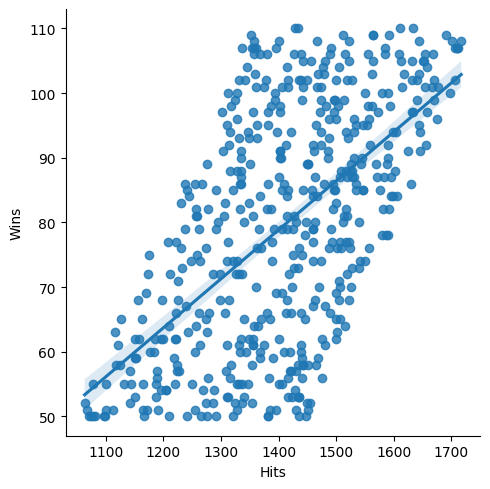

In [38]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.lmplot(x ='Hits' , y ='Wins' , data = df)
plt.show()

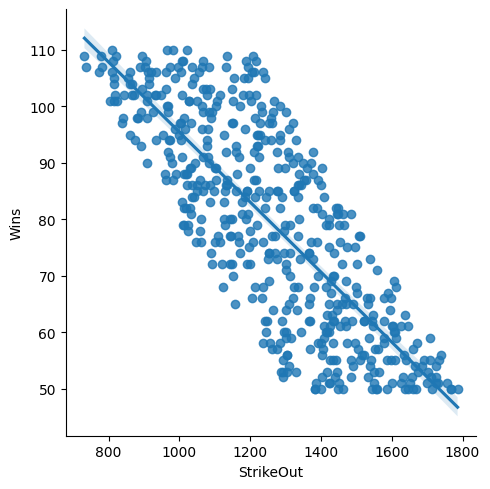

In [39]:
sns.lmplot(x = 'StrikeOut' ,y = 'Wins' , data = df)
plt.show()

In [40]:
df2 = df.drop(columns= ['Team' , 'Season', 'Losses'], axis = 1)

In [41]:
df2.head()

,Wins,Hits,Doubles,Tripples,HomeRuns,StrikeOut
0,50,1276,246,-6,150,1714
1,64,1256,240,-6,62,1266
2,58,1353,299,18,167,1392
3,75,1259,224,21,98,1496
4,94,1315,273,42,238,875


In [42]:
df2.columns

Index(['Wins', 'Hits', 'Doubles', 'Tripples', 'HomeRuns', 'StrikeOut'], dtype='object')

In [43]:
X = df[['Hits', 'Doubles', 'Tripples', 'HomeRuns', 'StrikeOut']]
y = df[['Wins']]

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state= 24)

In [48]:
X_train

,Hits,Doubles,Tripples,HomeRuns,StrikeOut
211,1301,383,35,209,1253
84,1640,269,59,268,1197
398,1443,313,27,154,1049
118,1523,393,62,322,1068
126,1311,216,-16,102,1329
...,...,...,...,...,...
401,1506,295,33,221,1270
343,1279,199,-3,180,1578
192,1211,234,2,110,1190
387,1345,294,39,190,1036


In [46]:
X_train

,Hits,Doubles,Tripples,HomeRuns,StrikeOut
496,1459,270,21,155,1010
288,1488,331,20,168,1209
446,1363,292,54,165,999
347,1594,250,37,268,1089
184,1348,297,36,148,1160
...,...,...,...,...,...
424,1405,276,36,253,908
354,1449,333,47,201,866
245,1450,219,28,235,1199
110,1378,280,38,314,930
